<a href="https://colab.research.google.com/github/elyorakhmat/ML_journey/blob/main/linear_reg_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing a simple linear regression model by sklearn.

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leading the df
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [3]:
housing = df[df['district'] == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1616 entries, 2 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    1616 non-null   object 
 1   rooms       1616 non-null   int64  
 2   size        1616 non-null   float64
 3   level       1616 non-null   int64  
 4   max_levels  1616 non-null   int64  
 5   price       1616 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 88.4+ KB


In [5]:
# train-test set splitting
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size= 0.1, random_state= 42)

In [6]:
# separating predictors and labels
# train set
x_train = train_set[['size']].to_numpy()
y_train = train_set[['price']].to_numpy()

# test set
x_test = test_set[['size']].to_numpy()
y_test = test_set[['price']].to_numpy()

In [7]:
# model development
from sklearn import linear_model

LR_model = linear_model.LinearRegression()

# model training
LR_model.fit(x_train, y_train)

LinearRegression()

In [8]:
# calculating the coeffitcients in the equation
c1 = LR_model.coef_[0][0]
c2 = LR_model.intercept_[0]

print('c1 = ', c1)
print('c2 = ', c2)

c1 =  732.7784051414766
c2 =  106.31843170110369


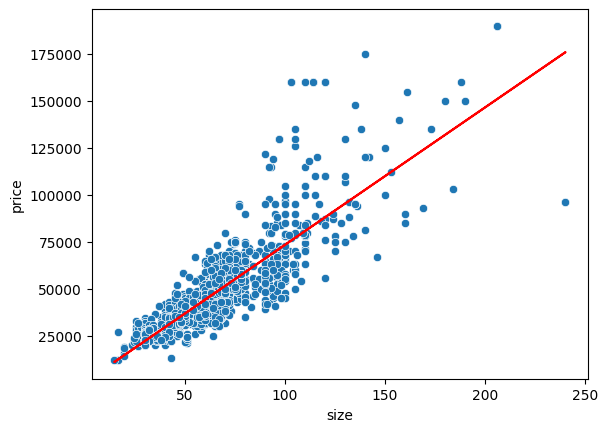

In [9]:
# visualizing
sns.scatterplot(data= housing, x= 'size', y= 'price')
plt.plot(x_train, c1*x_train + c2, color= 'r')
plt.show()

In [10]:
# predicting
y_pred = LR_model.predict(x_test)

In [11]:
# comparing predicted values to real ones
pred_show = pd.DataFrame({'size': x_test.flatten(), 'predicted': y_pred.flatten(), 'real': y_test.flatten()})
pred_show.head()

,size,predicted,real
0,54.0,39676.352309,37500.0
1,42.0,30883.011448,26500.0
2,36.0,26486.341017,25500.0
3,60.0,44073.022740,39000.0
4,48.0,35279.681878,32500.0


In [12]:
# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE = ', mae)
print('RMSE = ', rmse)

MAE =  7269.709648262382
RMSE =  12734.803748258666
